# __PROJECT DETAILS__
    1) Gathering the Data
    2) Assessing and Cleaning the Data
    3) Storing, Analyzing and Visualizing the Data


In [198]:
# Import required modules
import numpy as np
import os
import json
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import requests
import urllib
import tweepy
import re

from plotly.subplots import make_subplots
from tweepy import OAuthHandler
from timeit import default_timer as timer
from datetime import datetime

## 1) __Gather the Data__

 1.1) The "twitter-archive-enhanced.csv" is a Twitter archive containing the data about the tweets of user @dog_rates also known as WeRateDogs. This file was provided directly.

In [199]:
twitter_archive_enhanced_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [200]:
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


1.2) The "image-predictions.tsv" is a file that was generated using a model to detect the dog breed in the tweet's photos. This file is supposed to be downloaded using   
the requests module.

In [201]:
image_prediction_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(image_prediction_url)

url_content = req.content
with open("image-predictions.tsv", "wb") as tsv_file:
    tsv_file.write(url_content)    

In [202]:
image_predictions_df = pd.read_csv("image-predictions.tsv", sep = "\t")
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [203]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


1.3) The "tweet_json.txt" is created by quering the Twitter API using the tweepy module. The Twitter API is used to gather additional data about the tweet_id's in twitter-archive-enhanced.csv.


In [204]:
consumer_key = "HIDDEN" 
consumer_secret = "HIDDEN"
access_key = "HIDDEN"
access_secret = "HIDDEN"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [205]:
"""# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

'# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitter_archive_enhanced_df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each twee

In [206]:
tweet_json_df = pd.read_json("tweet_json.txt", lines=True)
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [207]:
tweet_json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

### 2) __Assess and Clean the data__

2.1) Assessing the file "twitter-archive-enhanced.csv" for cleanliness and tidiness issues.

In [208]:
twitter_archive_enhanced_df = pd.read_csv("twitter-archive-enhanced.csv")

In [209]:
twitter_archive_enhanced_df.shape

(2356, 17)

In [210]:
twitter_archive_enhanced_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [211]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [212]:
twitter_archive_enhanced_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminus. He's in a tub for some reason. What a jokester. Smh 7/10 churlish af https://t.co/84L4ED9Tpi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576495472641/photo/1,7,10,Jiminus,None,None,None,None


### __ISSUE #1__ 
We would like only orignal tweets, no re-tweets should be included. So we remove re-tweets from our dataframe.

In [213]:
twitter_archive_enhanced_df.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [214]:
twitter_archive_enhanced_df_cleaned = twitter_archive_enhanced_df[twitter_archive_enhanced_df.retweeted_status_id.isnull()]

In [215]:
twitter_archive_enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [216]:
twitter_archive_enhanced_df_cleaned = twitter_archive_enhanced_df_cleaned.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [217]:
twitter_archive_enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### __ISSUE #2__ 
The columns "in_reply_to_status_id" and "in_reply_to_user_id" have almost all the values as null, so they will not be substantial in analyzing and visualizing the data. So we can drop them.

In [218]:
twitter_archive_enhanced_df_cleaned = twitter_archive_enhanced_df_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [219]:
twitter_archive_enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [220]:
twitter_archive_enhanced_df_cleaned.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None


### __ISSUE #3__ 
The "timestamp" column is of "object" type, instead it should be "datetime" type.

In [221]:
twitter_archive_enhanced_df_cleaned.timestamp = pd.to_datetime(twitter_archive_enhanced_df_cleaned.timestamp, yearfirst=True)
twitter_archive_enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 220.9+ KB


In [222]:
twitter_archive_enhanced_df_cleaned.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

### __ISSUE #4__ 
We can see that there are possible 4 values for the "source" of the tweet, We can Tidy up the data frame by replacing the source values with simpler text like "Twitter for iPhone" , "Vine - Make a Scene" etc.

In [223]:
twitter_archive_enhanced_df_cleaned.replace(to_replace="<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", 
                                            value = "Twitter for iPhone",inplace=True)
twitter_archive_enhanced_df_cleaned.replace(to_replace="<a href=\"http://vine.co\" rel=\"nofollow\">Vine - Make a Scene</a>", 
                                            value = "Vine - Make a Scene",inplace=True)
twitter_archive_enhanced_df_cleaned.replace(to_replace="<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", 
                                            value = "Twitter Web Client",inplace=True)
twitter_archive_enhanced_df_cleaned.replace(to_replace="<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>", 
                                            value = "TweetDeck", inplace=True)

In [224]:
twitter_archive_enhanced_df_cleaned.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1900,674664755118911488,2015-12-09 18:59:46+00:00,Twitter for iPhone,This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,https://twitter.com/dog_rates/status/674664755118911488/photo/1,10,10,Rodman,None,None,None,None
871,761599872357261312,2016-08-05 16:28:54+00:00,Twitter for iPhone,"This is Sephie. According to this picture, she can read. Fantastic at following directions. 11/10 such a good girl https://t.co/7HY9RvCudo",https://twitter.com/dog_rates/status/761599872357261312/photo/1,11,10,Sephie,None,None,None,None
823,770069151037685760,2016-08-29 01:22:47+00:00,Twitter for iPhone,Say hello to Carbon. This is his first time swimming. He's having a h*ckin blast. 10/10 we should all be this happy https://t.co/mADHGenzFS,https://twitter.com/dog_rates/status/770069151037685760/photo/1,10,10,Carbon,None,None,None,None


In [225]:
twitter_archive_enhanced_df_cleaned.text

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

In [226]:
twitter_archive_enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 220.9+ KB


We can see that we have only 2117 non-null "expanded_urls" ie. links to images. So some tweets have missing images. We can check that later.

In [227]:
twitter_archive_enhanced_df_cleaned.rating_numerator.value_counts()

12     500
10     442
11     426
13     307
9      156
      ... 
45     1  
75     1  
99     1  
121    1  
204    1  
Name: rating_numerator, Length: 40, dtype: int64

In [228]:
twitter_archive_enhanced_df_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,13.215172,10.492874
std,47.725696,7.019084
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [229]:
type(twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.rating_denominator > 10])

pandas.core.frame.DataFrame

In [230]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.rating_denominator != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


### __ISSUE #5__ 
Some of the "rating_denominators" are not correct. Like, some are about multiple dogs or multiple photos of the same dog. Some include errors due to inefficient scraping. We can solve this issue by inputing correct values or dropping unnessary rows.

In [231]:
# As it can be seen from the text the actual rating is 13/10
twitter_archive_enhanced_df_cleaned.at[313, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[313, 'rating_numerator'] = 13
twitter_archive_enhanced_df_cleaned.loc[313]

tweet_id              835246439529840640                                                                                
timestamp             2017-02-24 21:54:03+00:00                                                                         
source                Twitter for iPhone                                                                                
text                  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
expanded_urls         NaN                                                                                               
rating_numerator      13                                                                                                
rating_denominator    10                                                                                                
name                  None                                                                                              
doggo                 None      

In [232]:
# No rating provided, it is actually a date
twitter_archive_enhanced_df_cleaned.drop([342],inplace=True)

In [233]:
# No rating provided, it is actually an expression
twitter_archive_enhanced_df_cleaned.drop([516],inplace=True)

In [234]:
# As it can be seen from the text the actual rating is 14/10
twitter_archive_enhanced_df_cleaned.at[1068, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[1068, 'rating_numerator'] = 14
twitter_archive_enhanced_df_cleaned.loc[1068]

tweet_id              740373189193256964                                                                                                                                                                                                                                             
timestamp             2016-06-08 02:41:38+00:00                                                                                                                                                                                                                                      
source                Twitter for iPhone                                                                                                                                                                                                                                             
text                  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ    

In [235]:
# As it can be seen from the text the actual rating is 13/10
twitter_archive_enhanced_df_cleaned.at[1165, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[1165, 'rating_numerator'] = 13
twitter_archive_enhanced_df_cleaned.loc[1165]

tweet_id              722974582966214656                                              
timestamp             2016-04-21 02:25:47+00:00                                       
source                Twitter for iPhone                                              
text                  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
expanded_urls         https://twitter.com/dog_rates/status/722974582966214656/photo/1 
rating_numerator      13                                                              
rating_denominator    10                                                              
name                  None                                                            
doggo                 None                                                            
floofer               None                                                            
pupper                None                                                            
puppo                 None                 

In [236]:
# As it can be seen from the text the actual rating is 11/10
twitter_archive_enhanced_df_cleaned.at[1202, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[1202, 'rating_numerator'] = 11
twitter_archive_enhanced_df_cleaned.loc[1202]

tweet_id              716439118184652801                                                                                                   
timestamp             2016-04-03 01:36:11+00:00                                                                                            
source                Twitter for iPhone                                                                                                   
text                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
expanded_urls         https://twitter.com/dog_rates/status/716439118184652801/photo/1                                                      
rating_numerator      11                                                                                                                   
rating_denominator    10                                                                                                                   
name                

In [237]:
# As it can be seen from the text the actual rating is 10/10
twitter_archive_enhanced_df_cleaned.at[1662, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[1662, 'rating_numerator'] = 10
twitter_archive_enhanced_df_cleaned.loc[1662]

tweet_id              682962037429899265                                                                                                                         
timestamp             2016-01-01 16:30:13+00:00                                                                                                                  
source                Twitter for iPhone                                                                                                                         
text                  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
expanded_urls         https://twitter.com/dog_rates/status/682962037429899265/photo/1                                                                            
rating_numerator      10                                                                                                                                         
rating_denominator    10    

In [238]:
# As it can be seen from the text the actual rating is 9/10
twitter_archive_enhanced_df_cleaned.at[2335, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[2335, 'rating_numerator'] = 10
twitter_archive_enhanced_df_cleaned.loc[2335]

tweet_id              666287406224695296                                                                                                                      
timestamp             2015-11-16 16:11:11+00:00                                                                                                               
source                Twitter for iPhone                                                                                                                      
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
expanded_urls         https://twitter.com/dog_rates/status/666287406224695296/photo/1                                                                         
rating_numerator      10                                                                                                                                      
rating_denominator    10                      

In [239]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.rating_denominator != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4,20
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


In [240]:
#We can drop these tweets as they have inconsistent rating
twitter_archive_enhanced_df_cleaned.drop([433,902,1120,1228,1254,1274,1351,1433,1598,1634,1635,1663,1779,1843],inplace=True)

In [241]:
twitter_archive_enhanced_df_cleaned.rating_numerator.value_counts()

12      500
10      444
11      426
13      309
9       155
8       98 
7       53 
14      44 
5       36 
6       32 
3       19 
4       15 
2       9  
1       7  
0       2  
420     2  
75      1  
26      1  
182     1  
27      1  
1776    1  
15      1  
17      1  
666     1  
Name: rating_numerator, dtype: int64

In [242]:
#Looks Legit
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.rating_numerator == 0][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


In [243]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.rating_numerator < 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].head()

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10


In [244]:
#Floating value in numerator, rounding off
twitter_archive_enhanced_df_cleaned.at[45, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[45, 'rating_numerator'] = round(13.5)
twitter_archive_enhanced_df_cleaned.loc[45]

tweet_id              883482846933004288                                                                                                                      
timestamp             2017-07-08 00:28:19+00:00                                                                                                               
source                Twitter for iPhone                                                                                                                      
text                  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
expanded_urls         https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1         
rating_numerator      14                                                                                                                                      
rating_denominator    10                      

Checking for possible other tweets containing floating values  in numerator, which were wrongly scraped and rounding them off.

In [245]:
tweets_id = twitter_archive_enhanced_df_cleaned.tweet_id
texts = twitter_archive_enhanced_df_cleaned.text

for tweet_id, text in zip(tweets_id,texts):
    if len(re.findall(r'[\d]+[\.]+[\d]+\/[10]', text)) != 0:
        print(tweet_id, text ,re.findall(r'[\d]+[\.]+[\d]+', text))



883482846933004288 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 ['13.5']
786709082849828864 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS ['9.75']
778027034220126208 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq ['11.27']
681340665377193984 I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace ['9.5']
680494726643068929 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD ['11.26']


In [246]:
#Already cleaned
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.tweet_id == 883482846933004288]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",14,10,Bella,None,None,None,None


In [247]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.tweet_id == 786709082849828864]
#Floating value in numerator, rounding off
twitter_archive_enhanced_df_cleaned.at[695, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[695, 'rating_numerator'] = round(9.75)
twitter_archive_enhanced_df_cleaned.loc[695]

tweet_id              786709082849828864                                                                                                              
timestamp             2016-10-13 23:23:56+00:00                                                                                                       
source                Twitter for iPhone                                                                                                              
text                  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
expanded_urls         https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                 
rating_numerator      10                                                                                                                              
rating_denominator    10                                                                      

In [248]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.tweet_id == 778027034220126208]
#Floating value in numerator, rounding off
twitter_archive_enhanced_df_cleaned.at[763, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[763, 'rating_numerator'] = round(11.27)
twitter_archive_enhanced_df_cleaned.loc[763]

tweet_id              778027034220126208                                                                                                                                               
timestamp             2016-09-20 00:24:34+00:00                                                                                                                                        
source                Twitter for iPhone                                                                                                                                               
text                  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
expanded_urls         https://twitter.com/dog_rates/status/778027034220126208/photo/1                                                                                                  
rating_numerator      11                                                        

In [249]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.tweet_id == 681340665377193984]
#Floating value in numerator, rounding off
twitter_archive_enhanced_df_cleaned.at[1689, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[1689, 'rating_numerator'] = round(9.5)
twitter_archive_enhanced_df_cleaned.loc[1689]

tweet_id              681340665377193984                                                                                        
timestamp             2015-12-28 05:07:27+00:00                                                                                 
source                Twitter for iPhone                                                                                        
text                  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
expanded_urls         NaN                                                                                                       
rating_numerator      10                                                                                                        
rating_denominator    10                                                                                                        
name                  None                                                                       

In [250]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.tweet_id == 680494726643068929]
#Floating value in numerator, rounding off
twitter_archive_enhanced_df_cleaned.at[1712, 'rating_denominator'] = 10
twitter_archive_enhanced_df_cleaned.at[1712, 'rating_numerator'] = round(11.26)
twitter_archive_enhanced_df_cleaned.loc[1712]

tweet_id              680494726643068929                                                                                        
timestamp             2015-12-25 21:06:00+00:00                                                                                 
source                Twitter for iPhone                                                                                        
text                  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
expanded_urls         https://twitter.com/dog_rates/status/680494726643068929/photo/1                                           
rating_numerator      11                                                                                                        
rating_denominator    10                                                                                                        
name                  None                                                                       

In [251]:
twitter_archive_enhanced_df_cleaned.name.value_counts()

None              667
a                 54 
Lucy              11 
Charlie           11 
Cooper            10 
Oliver            10 
Penny             9  
Tucker            9  
Winston           8  
Lola              8  
the               8  
Sadie             8  
Toby              7  
Daisy             7  
Oscar             6  
Stanley           6  
Bo                6  
Bella             6  
Bailey            6  
an                6  
Koda              6  
Jax               6  
Bentley           5  
Buddy             5  
Milo              5  
Rusty             5  
Dave              5  
Louis             5  
Chester           5  
Scout             5  
Leo               5  
Jerry             4  
Derek             4  
Boomer            4  
Alfie             4  
Clarence          4  
one               4  
Gus               4  
Reggie            4  
Sammy             4  
Scooter           4  
Finn              4  
very              4  
Gary              4  
Maggie            4  
Winnie    

### __ISSUE #6__ 
Lot of names are articles like "a", "an" probably due to inefficient scraping. Also the names are in title case, so we can filter out non names by finding lowercase names. We also have value None instead of NaN.

In [252]:
# Replace all lower case names with NaN
twitter_archive_enhanced_df_cleaned.name.replace(twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.name.str.islower()].name,
                                                np.nan, inplace=True)

In [253]:
# Replace None with NaN
twitter_archive_enhanced_df_cleaned.name.replace('None', 
                        np.nan, inplace = True)

In [254]:
twitter_archive_enhanced_df_cleaned.name.value_counts()

Charlie           11
Lucy              11
Oliver            10
Cooper            10
Penny             9 
Tucker            9 
Sadie             8 
Winston           8 
Lola              8 
Daisy             7 
Toby              7 
Bailey            6 
Bella             6 
Oscar             6 
Stanley           6 
Koda              6 
Jax               6 
Bo                6 
Scout             5 
Dave              5 
Chester           5 
Buddy             5 
Louis             5 
Rusty             5 
Bentley           5 
Leo               5 
Milo              5 
George            4 
Jack              4 
Maggie            4 
Derek             4 
Clarence          4 
Dexter            4 
Archie            4 
Boomer            4 
Jeffrey           4 
Reggie            4 
Winnie            4 
Scooter           4 
Larry             4 
Sammy             4 
Gus               4 
Gary              4 
Bear              4 
Duke              4 
Clark             4 
Oakley            4 
Chip         

Some of the name are doubtful, or are probably incomplete like Al, O, DayZ. Let's fix whatever we can with correct values.

In [255]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.name == 'Al']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
820,770414278348247044,2016-08-30 00:14:12+00:00,Twitter for iPhone,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,https://twitter.com/dog_rates/status/770414278348247044/photo/1,11,10,Al,None,None,None,None


In [256]:
twitter_archive_enhanced_df_cleaned.replace("Al", value="Al Cabone", inplace=True)

In [257]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.name == 'Al Cabone']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
820,770414278348247044,2016-08-30 00:14:12+00:00,Twitter for iPhone,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,https://twitter.com/dog_rates/status/770414278348247044/photo/1,11,10,Al Cabone,None,None,None,None


In [258]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.name == 'O']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38+00:00,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [259]:
twitter_archive_enhanced_df_cleaned.replace("O", value="O'Malley", inplace=True)

In [260]:
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.name == 'O\'Malley']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38+00:00,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,None,None,None,None


In [261]:
#Looks Legit
twitter_archive_enhanced_df_cleaned[twitter_archive_enhanced_df_cleaned.name == 'DayZ']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2221,668480044826800133,2015-11-22 17:23:57+00:00,Twitter for iPhone,Say hello to DayZ. She is definitely stuck on that stair. Just looking for someone to help her. 11/10 I would help https://t.co/be3zMW0Qj5,https://twitter.com/dog_rates/status/668480044826800133/photo/1,11,10,DayZ,None,None,None,None


### __ISSUE #7__ 
Multiple columns containing similar value, ie. "dog_stage", so we can have a single column containing either "doggo", "floofer", "pupper" or "puppo"

In [262]:
twitter_archive_enhanced_df_cleaned['dog_stage'] = twitter_archive_enhanced_df_cleaned.text.str.extract('(doggo|pupper|floofer|puppo)', expand=True)
twitter_archive_enhanced_df_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1, inplace=True)

In [263]:
twitter_archive_enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2159 non-null int64
timestamp             2159 non-null datetime64[ns, UTC]
source                2159 non-null object
text                  2159 non-null object
expanded_urls         2104 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  1390 non-null object
dog_stage             357 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 248.7+ KB


## 2.2) Assessing the "image-prediction.tsv" file.

In [264]:
image_predictions_df = pd.read_csv("image-predictions.tsv", sep="\t")
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [265]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
373,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,0.836632,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,0.091133,False
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,0.036320,True
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
1483,781251288990355457,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,2,Mexican_hairless,0.887771,True,Italian_greyhound,0.030666,True,seat_belt,0.026730,False
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkWuUUAAYWU1.jpg,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
1846,839239871831150596,https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg,3,Leonberg,0.927021,True,Newfoundland,0.050009,True,Saint_Bernard,0.010728,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True


### __ISSUE #1__ 
The file contains a lot of data, most of it unnecessary for analysis and visualization. We can clean the dataframe by only creating columns like, "tweet_id", "breed"; if it is a dog, else "NaN".

In [266]:
#Looking at the sample we can conclude that p1_conf > p2_conf > p3_conf.
#So if p1 tells us that it is a dog, then we donot check any other predictions
#else we check p2 and so on...
#Further on we can improve our possible breed, by calculating the difference between the p1_con, p2_conf ; p2_conf, p3_conf.
#if the prediction p1 false and p1_conf - p2_conf < 0.01 then only we update the breed
#We possibly do not want something that 90% looks like a broom, and 10% looks like a dog.
p1 = image_predictions_df.p1
p2 = image_predictions_df.p2
p3 = image_predictions_df.p3

p1_conf = image_predictions_df.p1_conf
p2_conf = image_predictions_df.p2_conf
p3_conf = image_predictions_df.p3_conf

p1_dog = image_predictions_df.p1_dog
p2_dog = image_predictions_df.p2_dog
p3_dog = image_predictions_df.p3_dog

breed = []

for i in range(len(image_predictions_df.tweet_id)):
    if p1_dog[i] == True:
        breed.append(p1[i])
        continue
        
    if p2_dog[i] == True and p1_conf[i] - p2_conf[i] < 0.01:
        breed.append(p2[i])
        continue
    
    if p3_dog[i] == True and p2_conf[i] - p3_conf[i] < 0.01:
        breed.append(p3[i])
        continue
        
    breed.append(np.nan)

In [267]:
image_predictions_df['breed'] = breed
image_predictions_df_cleaned = image_predictions_df[['tweet_id', 'breed']].copy()

In [268]:
image_predictions_df_cleaned.sample(10)

,tweet_id,breed
672,683142553609318400,Leonberg
2045,886366144734445568,French_bulldog
1514,786664955043049472,Leonberg
1177,737800304142471168,malamute
1098,720389942216527872,Pembroke
1760,825876512159186944,NaN
380,673295268553605120,golden_retriever
1691,815966073409433600,Tibetan_mastiff
268,670811965569282048,basset
1345,759159934323924993,Irish_terrier


### __ISSUE #2__ 
The breed names are not readable.

In [269]:
image_predictions_df_cleaned['breed'] = image_predictions_df_cleaned.breed.str.split("_")

In [270]:
image_predictions_df_cleaned['breed'] = image_predictions_df_cleaned[image_predictions_df_cleaned.breed.notnull()].breed.apply(" ".join)

In [271]:
image_predictions_df_cleaned['breed'] = image_predictions_df_cleaned['breed'].str.title()

In [272]:
image_predictions_df_cleaned.sample(5)

,tweet_id,breed
1719,819227688460238848,Border Terrier
1793,831262627380748289,Cocker Spaniel
561,677895101218201600,Dalmatian
665,682750546109968385,English Setter
581,678774928607469569,Pembroke


## 2.3) Assessing the "tweet_json.txt" file.

In [273]:
tweet_json_df = pd.read_json("tweet_json.txt", lines=True)
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

### __ISSUE #1__ 
This dataframe contains a lot of data but not all of it is useful to us. We are just going to keep the id, the retweet_count, the favorite_count and we ar going to drop rest of the columns.

In [274]:
tweet_json_df_cleaned = tweet_json_df[['id', 'retweet_count', 'favorite_count']]
tweet_json_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


### __ISSUE #2__ 
Rename the column "id" to "tweet_id" to have a common column across all dataframes.

In [275]:
# Rename the id to tweet_id just to keep things similiar
pd.set_option('mode.chained_assignment', None)
tweet_json_df_cleaned.rename(columns={'id':'tweet_id'},inplace=True)

In [276]:
tweet_json_df_cleaned.sample(3)

,tweet_id,retweet_count,favorite_count
1713,680221482581123072,329,1598
208,852226086759018497,7570,21378
1251,710833117892898816,606,2937


__OTHER ISSUES__ Since all the dataframe are about the same tweet, it would be wise to merge them to tidy up the data frames.

In [277]:
pd.set_option('display.max_rows', 10)
twitter_archive_enhanced_master_df = twitter_archive_enhanced_df_cleaned.copy()

In [278]:
twitter_archive_enhanced_master_df = twitter_archive_enhanced_master_df.merge(image_predictions_df_cleaned, on="tweet_id", how="left")

In [279]:
twitter_archive_enhanced_master_df = twitter_archive_enhanced_master_df.merge(tweet_json_df_cleaned, on="tweet_id", how="inner")

In [280]:
twitter_archive_enhanced_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 12 columns):
tweet_id              2159 non-null int64
timestamp             2159 non-null datetime64[ns, UTC]
source                2159 non-null object
text                  2159 non-null object
expanded_urls         2104 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  1390 non-null object
dog_stage             357 non-null object
breed                 1522 non-null object
retweet_count         2159 non-null int64
favorite_count        2159 non-null int64
dtypes: datetime64[ns, UTC](1), int64(5), object(6)
memory usage: 219.3+ KB


In [281]:
twitter_archive_enhanced_master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,retweet_count,favorite_count
58,880221127280381952,2017-06-29 00:27:25+00:00,Twitter for iPhone,Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well https://t.co/fUod0tVmvK,"https://twitter.com/dog_rates/status/880221127280381952/photo/1,https://twitter.com/dog_rates/status/880221127280381952/photo/1",12,10,Jesse,NaN,Chihuahua,4436,27640
129,863432100342583297,2017-05-13 16:33:49+00:00,Twitter for iPhone,This is Belle. She's never been more pupset. Encountered the worst imaginable type of zone. 12/10 would do anything to cheer pup https://t.co/fGQUzR8w3H,https://twitter.com/dog_rates/status/863432100342583297/photo/1,12,10,Belle,NaN,Staffordshire Bullterrier,5664,24829
140,860563773140209665,2017-05-05 18:36:06+00:00,Twitter for iPhone,"Meet Lorenzo. He's an avid nifty hat wearer and absolute 13/10, but he needs your help to beat cancer. Link below\n\nhttps://t.co/qZdSdzm08p https://t.co/oDIQ1KkdPt","https://www.gofundme.com/help-lorenzo-beat-cancer,https://twitter.com/dog_rates/status/860563773140209665/photo/1,https://twitter.com/dog_rates/status/860563773140209665/photo/1",13,10,Lorenzo,NaN,Cardigan,2334,7878
1228,698635131305795584,2016-02-13 22:29:29+00:00,Twitter for iPhone,Here we are witnessing five Guatemalan Birch Floofs in their natural habitat. All 12/10 (Vid by @pootdanielle) https://t.co/rb8nzVNh7F,https://twitter.com/dog_rates/status/698635131305795584/video/1,12,10,NaN,NaN,Samoyed,388,1400
697,762464539388485633,2016-08-08 01:44:46+00:00,Twitter for iPhone,This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.co/zGSj1oUgxx,"https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1",12,10,Buddy,NaN,Chow,4839,11503


## 3) Storing, Analyzing and Visualizing the Data.

### 3.1) Storing the Data

1) Save the clean dataframe as, "twitter_archive_master.csv".

In [282]:
twitter_archive_enhanced_master_df.to_csv('twitter_archive_master.csv', index=False)

In [283]:
df = pd.read_csv('twitter_archive_master.csv')

In [284]:
df[df.tweet_id == 778027034220126208]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,retweet_count,favorite_count
614,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11,10,Sophie,NaN,Clumber,1885,7320


### 3.2) Analyzing and Visualizing the data

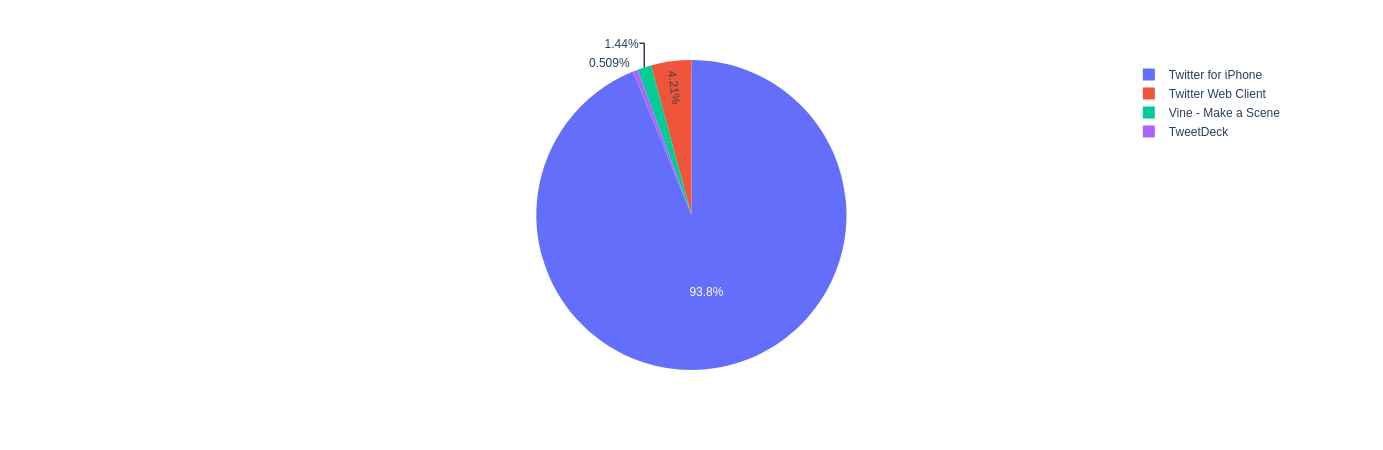

In [285]:
df = pd.read_csv('twitter_archive_master.csv')
# Sources of the tweets
cnt = df.source.value_counts()
name = df.source.unique()
fig = px.pie(df, values=cnt, names=name)
fig

In [286]:
#Top 5 breeds of dogs

#Breeds and their faviorite count, retweet count
df.breed.value_counts().head(5)

Golden Retriever      140
Labrador Retriever    95 
Pembroke              89 
Chihuahua             81 
Pug                   55 
Name: breed, dtype: int64

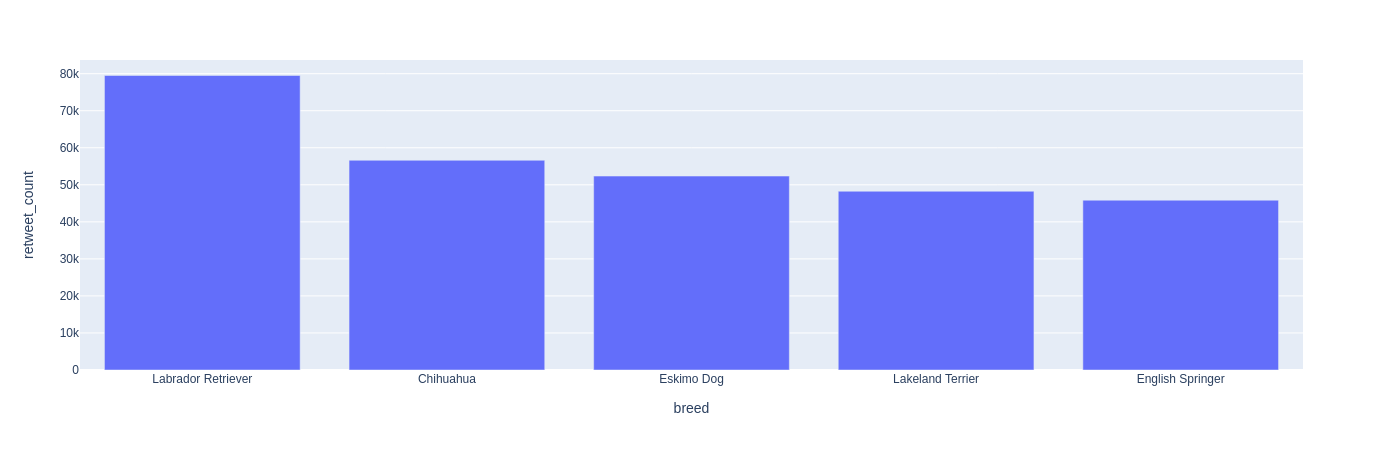

In [287]:
#Top 5 breed of dogs according to retweet_count
df[['tweet_id', 'breed', 'retweet_count']].sort_values(by='retweet_count', ascending=False).head(5)
plot_df = df[['tweet_id', 'breed', 'retweet_count']].sort_values(by='retweet_count', ascending=False).head(5)

fig = px.bar(plot_df, x='breed', y='retweet_count')
fig

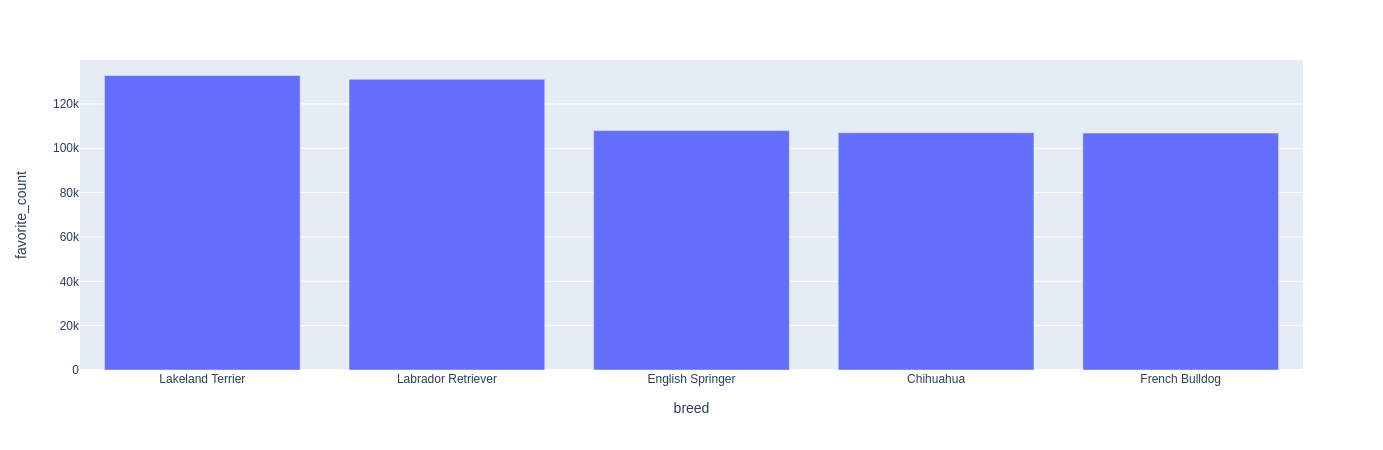

In [288]:
#Top 5 breed of dogs according to favorite_count
df[['tweet_id', 'breed', 'favorite_count']].sort_values(by='favorite_count', ascending=False).head(5)
plot_df = df[['tweet_id', 'breed', 'favorite_count']].sort_values(by='favorite_count', ascending=False).head(5)

fig = px.bar(plot_df, x='breed', y='favorite_count')
fig

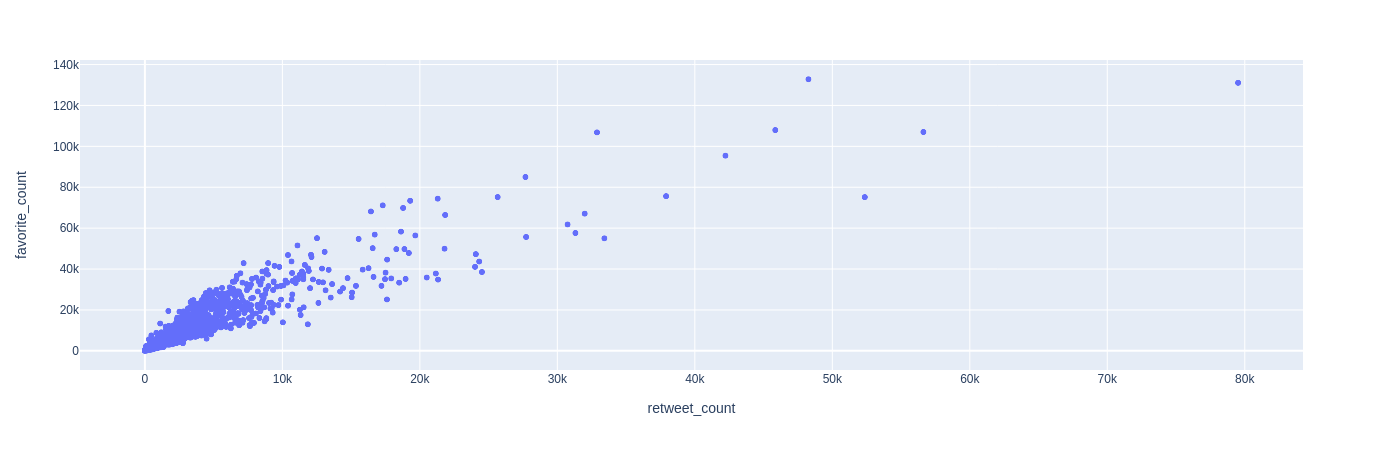

In [289]:
#A tweet having high retweet count probably has a high favorite count
fig = px.scatter(df, x='retweet_count', y='favorite_count')
fig

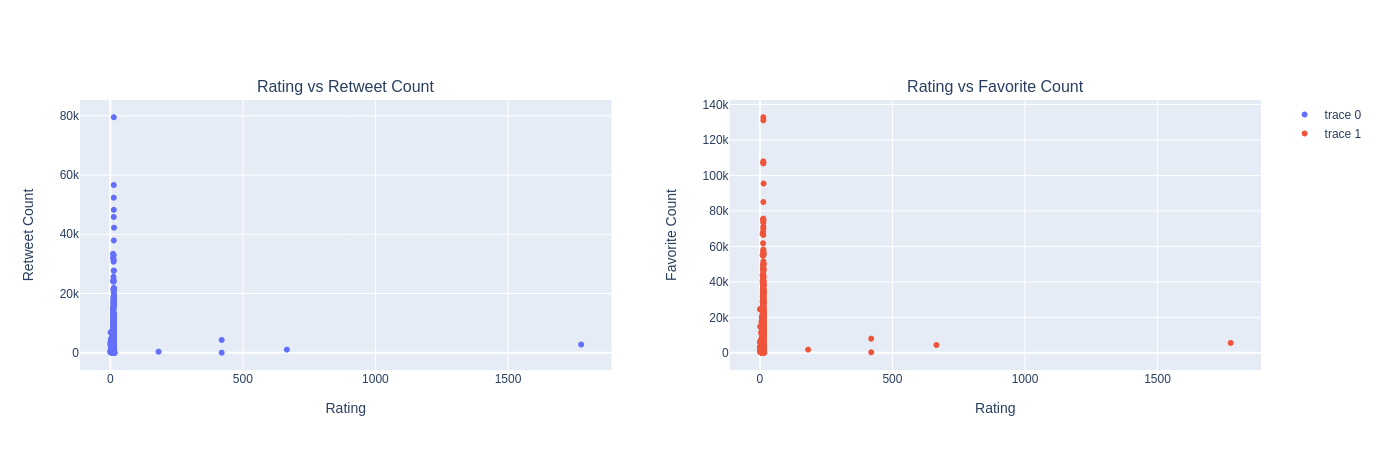

In [290]:
# Tweet with a high rating does'nt necessary mean a high favorite count or retweet count
fig = make_subplots(
    rows=1, cols=2, subplot_titles=('Rating vs Retweet Count', 'Rating vs Favorite Count')
)

fig.add_trace(
    go.Scatter(x=df.rating_numerator, y=df.retweet_count, mode='markers'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df.rating_numerator, y=df.favorite_count, mode='markers'),
    row=1, col=2
)

fig.update_xaxes(title_text="Rating", row=1, col=1)
fig.update_xaxes(title_text="Rating", row=1, col=2)


fig.update_yaxes(title_text="Retweet Count", row=1, col=1)
fig.update_yaxes(title_text="Favorite Count", row=1, col=2)


fig